In [35]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# 1. Simple Regression

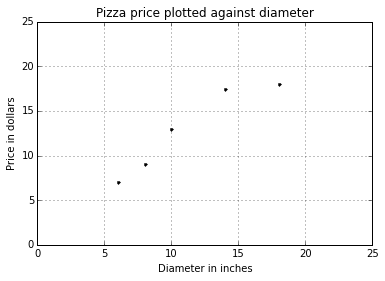

In [4]:
# **************************************************
# Let's model the relationship between the size of a pizza and its price

# Variables
X = [[6], [8], [10], [14],   [18]]
y = [[7], [9], [13], [17.5], [18]]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [38]:
# **************************************************
# estimator

from sklearn.linear_model import LinearRegression

# Training data
X = [[6], [8], [10], [14],   [18]]
y = [[7], [9], [13], [17.5], [18]]

# Create and fit the model
model = LinearRegression()
model.fit(X, y)
print("Intc: \t%s\nCoef: \t%s" % (model.intercept_[0], model.coef_[0]))
print('\nA 12" pizza should cost: $%.2f' % model.predict([12])[0])

Intc: 	1.96551724138
Coef: 	[ 0.9762931]

A 12" pizza should cost: $13.68


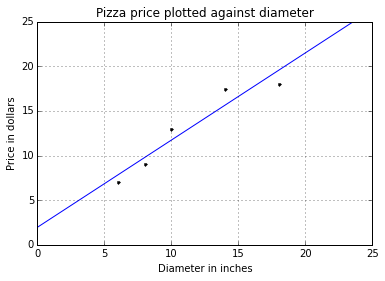

In [40]:
# **************************************************
# plot regression line

X_line = np.array(range(0, 25))
y_line = model.intercept_[0] + model.coef_[0][0] * X_line

# Variables
X = [[6], [8], [10], [14],   [18]]
y = [[7], [9], [13], [17.5], [18]]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.plot(X_line, y_line)
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

### Evaluating the  fitness of a model with a cost function

In [42]:
# **************************************************
# the residual sum of squares

print('Residual sum of squares: %.2f' %
      (np.mean((model.predict(X) - y) ** 2)))

Residual sum of squares: 1.75


### Solving ordinary least squares for simple linear regression

In [64]:
# **************************************************

# calculate the variance of the pizza diameters in training set:
var = np.var([6, 8, 10, 14, 18], ddof=1)
print("Variance(X): \t\t", var)

# calculate the covariance
cov = np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]
print("Convariance(X,y): \t", cov)


# calculate betta
betta = cov / var
print("\nBetta: \t\t\t", betta)


# calculate alpha
X_mean = np.mean([6, 8, 10, 14, 18])
y_mean = np.mean([7, 9, 13, 17.5, 18])

alpha = y_mean - betta * X_mean
print("alpha: \t\t\t", alpha)

Variance(X): 		 23.2
Convariance(X,y): 	 22.65

Betta: 			 0.976293103448
alpha: 			 1.96551724138


### Evaluating the model

In [66]:
# Test data
X_test = [[8],  [9],   [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]

# Calculare R-squared
print('R-squared: %.4f' % model.score(X_test, y_test))

R-squared: 0.6620


# 2. Multiple linear regression

In [69]:
from sklearn.linear_model import LinearRegression

# Training data: 2 explanatory(price, topping)
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7],    [9],    [13],    [17.5],  [18]]

# Train Regression Model
model = LinearRegression()
model.fit(X, y)

# Predict on Test Data
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11],   [8.5],  [15],    [18],    [11]]

predictions = model.predict(X_test)

for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))

    
# Evaluate Model by R-squared
print('\nR-squared: %.2f' % model.score(X_test, y_test))

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]

R-squared: 0.77


# 3. Polynomial regression

In [71]:
# Quadratic regression:
# y = alpha + betta1 * x + betta2 * x^2

/Users/Bya/.virtualenvs/py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


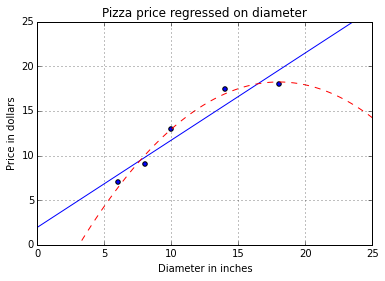

[Simple linear regression r-squared]:	 0.809726797708
[Quadratic regression r-squared]: 	 0.867544365635


In [86]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Data: Explanatory(size), Response(price)
X_train = [[6], [8], [10], [14],   [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6],  [8],   [11], [16]]
y_test = [[8], [12], [15], [18]]


# Plot Train Data
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)


# *******************************

# Single Linear Regression Model 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Plot Linear Regression Line
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)


# *******************************

# Quadratic variables
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)


# Polynomial Regression Model
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)


# Plot Polynomial Regression curve
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
yy_quadratic = regressor_quadratic.predict(xx_quadratic)
plt.plot(xx, yy_quadratic, c='r', linestyle='--')

plt.show()



# **********************************

# Model Evaluation scores by R-squared
print ('[Simple linear regression r-squared]:\t', regressor.score(X_test, y_test))
print ('[Quadratic regression r-squared]: \t', regressor_quadratic.score(X_test_quadratic, y_test))

# 4. Regularization

In [90]:
from sklearn.linear_model import LogisticRegression
# Lasso Regression
model_log = LogisticRegression(penalty="l1")

# Ridge Regression
model_log = LogisticRegression(penalty="l2")

# 5. Applying linear regression

In [103]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split

# Load data
df = pd.read_csv('data/wine.csv', sep=',')

# Split train, test data
X = df[list(df.columns)[1:]]
y = df['Alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict test
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))

R-squared: 0.903541918478


### Cross Validation

In [102]:
import pandas as pd
from sklearn. cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/wine.csv', sep=',')
X = df[list(df.columns)[1:]]
y = df['Alcohol']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean(), scores)

0.183425405594 [ 0.          0.51460008  0.          0.40252695  0.        ]


### Fitting models with gradient descent

In [104]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)